### ADNI correlation

In [1]:
LLM_Abeta=[]
LLM_Abeta_original=[]


In [2]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_abeta.csv")

D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
abeta_probability

,Index,Abeta-Clearly positive,Abeta-Weakly positive,Abeta-Intermediate negative,Abeta-Negative,Truth
0,0,0.000000,0.000000,0.000000,0.000000,Unknown.
1,1,0.000000,0.000000,0.000000,0.000000,Unknown.
2,2,0.000000,0.000000,0.000000,0.000000,Unknown.
3,3,0.000000,0.000000,0.000000,0.000000,Unknown.
4,4,0.000000,0.000000,0.000000,0.000000,Unknown.
...,...,...,...,...,...,...
2459,2459,0.017942,0.014417,0.061653,0.905988,Negative
2460,2460,0.229924,0.094360,0.165608,0.510108,Negative
2461,2461,0.394677,0.102958,0.159464,0.342901,Clearly positive
2462,2462,0.000000,0.000000,0.000000,0.000000,Unknown.


In [4]:
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")

In [5]:
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]

In [6]:
abeta_subset=abeta_probability[abeta_probability["Truth"]!="Unknown."]

In [7]:
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 2.33610688e+01  8.18793519e+01  9.58661732e+01  4.11149102e+00
  8.79787538e+00  2.07439815e+01  7.48175896e+01  6.32100917e+01
  5.08900382e+01  3.76871174e+01  4.85377649e+01  7.98247388e+01
  6.33095919e+01  9.59008105e+01  9.89063691e+01  9.86726685e+01
  8.64906488e+01  8.53253337e+00  1.21664120e+01  6.16805290e+01
  4.63335328e+01  7.10257801e+01  9.05283924e+01  2.25488062e+01
  6.88081883e+01  6.34734286e+01  3.72146836e+01  7.20592377e+01
  2.60674718e+01  2.13873086e+01  2.11482502e+01  2.80110785e+01
  2.02230310e+01  1.78137381e+01  1.66799482e+01  1.72444876e+01
  1.88718255e+01  1.01035141e+01  1.73196345e+01  2.56441937e+00
  6.34303611e+01  1.66367585e+01  2.12272756e+01  1.37906461e+01
  1.78014608e+01  1.76858631e+01  2.35146856e+01  7.70307258e+01
  9.01278942e+01  7.38294609e+01  6.46036047e+01  8.51071090e+01
  2.72491981e+00  8.12479196e+00  3.05065820e+00  4.80424889e+00
  3.44697048e+00  6.00904636e+00  1.42120791e+01  1.72128261e+01
  1.96108958e+01  1.99393

In [8]:
means

label
Clearly positive         101.889362
Intermediate negative     28.104478
Negative                  -2.698925
Weakly positive           49.450704
Name: CENTILOIDS, dtype: float64

In [9]:
np.max(combined_df.CENTILOIDS)

264.0

In [10]:
LLM_Abeta=LLM_Abeta+list(combined_df.CENTILOIDS)
LLM_Abeta_original=LLM_Abeta_original+list(recovered_values)


## HABS Correlation

In [11]:
import pandas as pd
habs_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta.csv")

In [12]:
habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")

In [13]:
habs_probability["CENTILOIDS"]=habs_testing["nearest_ab_centiloid"]

In [14]:
abeta_subset=habs_probability[habs_probability["Truth"]!="Unknown."]

In [15]:
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 8.36802367  5.40878758  4.83627236  5.53757178  4.81943566  6.27379259
  6.39080542 17.20104827 15.69487157 30.64519108  8.92135662 10.65539124
  5.38878666  4.87635758 28.71647981 36.81091488  9.01620596  7.30226128
  5.22589894 65.32228703  4.15679113 21.81944031  7.0281017  30.34828097
 16.87761442  6.54943208 71.83393987 10.21101984  5.16227154  5.27761871
 19.4540862   9.44793855  7.04062704 16.81486029  8.31973796 27.73929337
  4.66171951 15.43080667 25.72492184  6.26844584 10.42438925 40.23355965
 25.11057797  8.11337532 28.42291138 10.48568915  9.31080134 16.87646092
 15.14133953  7.93199314 23.9237155  68.3595487  23.75879412  6.89529693
 10.3779955   9.00847013 33.35806888 17.45723983 33.26927372 17.67851656
 13.67837175  7.30956193  4.23557795 18.03607949  4.53518698  4.37760187
  5.4344947   8.06196836  6.7306628   5.29101627 22.65076485  7.34616247
  7.46305736 10.47955568  4.49787141 18.57541221 22.59298711  8.57569745
  8.90883039 11.4307586   6.74142141 22.65966135  4

In [16]:
means

label
Clearly positive         87.911765
Intermediate negative    28.766667
Negative                  0.859890
Weakly positive          50.000000
Name: CENTILOIDS, dtype: float64

In [17]:
LLM_Abeta=LLM_Abeta+list(combined_df.CENTILOIDS)
LLM_Abeta_original=LLM_Abeta_original+list(recovered_values)


## POINTER correlation

In [18]:
import pandas as pd
pointer_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\POINTER-results\\POINTER_probability_abeta.csv")

In [19]:
pointer_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_testing.csv")

In [20]:
pointer_probability["CENTILOIDS"]=pointer_testing["FBB_CENTILOIDS_1"]

In [21]:
abeta_subset=pointer_probability[pointer_probability["Truth"]!="Unknown."]

In [22]:
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[11.34639697 22.52185684 15.0236749  11.52397118 14.09162482 18.2726195
 14.62634714 18.00077989 14.47507465 14.37396792 11.11684405 17.66275129
 24.24962347 23.96977379 18.57413099 18.42581347 29.65227083 18.45600615
 18.38860388 37.58478906 21.99760229 19.92522375 15.60048479 12.79438873
 17.05980098 15.692725   25.50997222 15.03044553 14.6639526  45.59118353
  9.50528835 15.39931684 13.73669444 10.34460202 24.47882395  9.26190541
 19.37082501 18.59370884 20.8042466  14.47427938  9.22515595 32.58778396
  9.66514208 11.62319602 10.95903623 25.67745217 32.46198981 11.13572493
 18.02169718 14.60015626 14.88042379 28.33550842 18.24340872 13.15523238
 13.17839633 29.19274373 21.96238961 18.71597361  9.64765907 32.21234919
 18.48158223 14.96792357 22.91438826 17.98295692 22.88289902 13.22161051
 13.51966608 11.00766058 15.72245701 18.53195299 12.41034362 39.42827907
 45.34796733 17.86728884 10.6231017  10.3377194   9.05848157 15.189429
 30.9416416  20.87326928 15.39900289 44.22576236 17.99

In [23]:
LLM_Abeta=LLM_Abeta+list(combined_df.CENTILOIDS)
LLM_Abeta_original=LLM_Abeta_original+list(recovered_values)


In [24]:
means

label
Clearly positive         93.466667
Intermediate negative    27.428571
Negative                  4.428571
Weakly positive          51.166667
Name: CENTILOIDS, dtype: float64

## A4 correlation

In [25]:
import pandas as pd
A4_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4-results\\A4_probability_abeta.csv")

In [26]:
A4_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4_thickness_Dec_17_validation.csv")

In [27]:
A4_probability["CENTILOIDS"]=A4_testing["centiloid"]

In [28]:
abeta_subset=A4_probability[A4_probability["Truth"]!="Unknown."]

In [29]:
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[15.6015479  14.8855797  29.89168841 32.81065796 16.69624061 15.55792497
 39.94337695 14.29583427 13.72751268 13.94407959 52.77542975 22.7268673
 56.17926924 17.78988247 19.85381345 20.50094612 14.3971793  41.70777501
 15.92618949 16.06132291 51.22720222 11.97019651 15.29513724 18.59860413
 15.89862182 17.56670235 53.88963978 17.73058657 17.03406568 40.93211659
 48.10971724 16.07973089 64.32680644 34.10398078 23.74526218 17.6642172
 50.19008826 37.06249439 17.80737797 25.37888093 19.49245212 34.09924331
 39.62182747 36.15991312 13.94873227 16.59545335 25.97132586 14.56606033
 15.3867062  14.00552167 43.28720967 30.62783951 64.9376095  17.65208705
 39.63172441 23.60926953 66.47033274 32.72116932 19.10210378 40.3930918
 32.60590183 41.35845298 16.33795923 24.33768578 12.51599166 15.90317161
 46.28873264 41.74595314 28.38438072 25.46108833 44.92591548 49.73598877
 26.0649128  17.75393919 28.35822699 15.00919072 24.02408137 36.48112361
 59.92666081 23.34174756 46.8449715  23.79440981 21.85

In [30]:
means

label
Clearly positive         89.953286
Intermediate negative    31.570564
Negative                  5.504883
Weakly positive          49.148302
Name: CENTILOIDS, dtype: float64

In [31]:
combined_df["label"].value_counts()

label
Clearly positive         186
Weakly positive          104
Intermediate negative     84
Negative                  66
Name: count, dtype: int64

In [32]:
LLM_Abeta=LLM_Abeta+list(combined_df.CENTILOIDS)
LLM_Abeta_original=LLM_Abeta_original+list(recovered_values)


In [33]:
correlation = np.corrcoef(LLM_Abeta, LLM_Abeta_original)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)

Correlation: 0.5844003901085577
Mean Squared Error (MSE): 1874.4562726404229


### ADNI Meta tau

In [34]:
LLM_tau=[]
LLM_tau_original=[]


In [35]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_meta_tau.csv")

In [36]:
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")

In [37]:
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]

In [38]:
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]

In [39]:
tau_subset

,Index,Meta Tau-Low,Meta Tau-Very low,Meta Tau-Super high,Meta Tau-High,Truth,zscore_meta_tau
98,98,0.126583,0.152688,0.524673,0.196056,Super high,2.160181
206,206,0.232822,0.251741,0.255705,0.259732,Super high,1.224505
280,280,0.184146,0.141189,0.414978,0.259687,Super high,2.628019
281,281,0.152502,0.152502,0.462457,0.232538,Super high,2.978898
283,283,0.158377,0.168591,0.472825,0.200207,Super high,3.095857
...,...,...,...,...,...,...,...
2457,2457,0.075705,0.097208,0.664294,0.162792,Super high,1.224505
2458,2458,0.254602,0.326915,0.096636,0.321847,High,0.522748
2459,2459,0.244398,0.361196,0.080594,0.313813,Very low,-0.880767
2460,2460,0.232013,0.262905,0.177891,0.327191,Super high,1.224505


In [40]:
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[2.47478443 1.1114787  1.99149542 2.19496349 2.20984266 0.42822996
 0.33067678 0.22985899 1.16450469 0.44542098 1.06307632 0.60177327
 0.60069251 0.36525968 0.45201992 2.41259046 2.74074392 2.89862526
 1.31702409 2.19794579 2.45717938 1.85928809 2.46793853 1.15100814
 2.71699276 1.01721208 2.13421708 2.73653302 4.15493121 0.54161638
 0.1914083  0.55768241 0.23578993 0.23486333 0.73948356 0.18013259
 0.46431484 0.1283291  0.56271356 1.8064142  1.49072863 0.52625283
 0.58043915 0.57108578 0.15300631 0.37465245 0.5427785  0.27686074
 1.1722542  0.62210739 3.66854346 4.46053337 0.44993507 0.63307169
 0.78117974 0.15331283 0.30892151 4.38482863 2.7071163  0.16668444
 0.18681908 0.16991804 0.05999157 1.30572291 0.36277111 0.41507125
 2.24169764 2.94930286 2.69162755 3.48384655 3.63550766 4.26103546
 0.38027218 0.36087247 0.64436893 0.65211308 3.04595177 3.05272949
 2.89065589 2.69832796 2.5361971  4.08209671 0.52766298 4.25431945
 4.5446026  4.26223848 0.18131252 0.68711115 0.24267879 0.2887

In [41]:
LLM_tau=LLM_tau+list(combined_df.CENTILOIDS)
LLM_tau_original=LLM_tau_original+list(recovered_values)


In [42]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[-5.03738806e-03 -6.22250268e-03  1.32499947e-01  8.18524402e-03
 -2.12496065e-03  1.43219477e-01  2.11818275e-01  3.14692355e-01
  1.14545538e-01  3.19267462e-01  3.19614306e-02  2.92664371e-01
  1.83532229e-01  6.49698446e-02 -6.13317656e-02  1.29994987e-01
  2.94076179e-01  2.57585179e-01  2.73487254e+00  1.52547836e-01
 -2.88962920e-02  9.05034960e-02  8.26212606e-02  2.05523300e-01
  1.19260187e-01  3.41176008e-01  6.60960329e-02  2.11888074e-01
  4.11193783e-01  4.15039244e-03  4.31945153e-01  2.45815072e-01
  1.79414573e-01  3.29389451e-01  1.71910983e-01  5.39526755e-02
  7.29842405e-02 -6.50787907e-02  1.10652950e-01  1.91043693e+00
 -3.39982289e-02 -3.89589352e-02  1.15918682e-01  6.84670787e-02
  6.42822794e-02 -2.80029784e-02 -8.94250944e-02  3.72554832e-01
 -4.61657093e-02 -4.02044761e-02 -1.13892101e-01  8.05515800e-02
  1.67612178e-01 -4.45726306e-02  5.52846375e-02  1.73475788e-01
  1.02574769e-01  1.45302159e-01  9.78636126e-02  1.87982865e-02
 -8.60974099e-02  1.83796

In [43]:
LLM_tau=LLM_tau+list(combined_df.CENTILOIDS)
LLM_tau_original=LLM_tau_original+list(recovered_values)


In [44]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\POINTER-results\\POINTER_probability_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_testing.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 5.65061163e-02  2.93760005e-01  1.25802393e-01  4.32320346e-02
  1.00573864e-01  8.41930931e-02  1.69015519e-01  9.83413737e-02
  1.13331533e-01  6.70423983e-02  1.92831648e-01  1.85095664e-01
  1.64649162e-01  1.72773206e-01  1.98921885e-01  2.12136540e-01
  1.51981067e-01  2.21618698e-01  1.54001732e-01  1.03290350e-01
  1.71015102e-01  1.21864227e-01  1.31826768e-01  1.13848085e-01
  2.42437311e-01  1.02283927e-01  1.24792441e+00  7.06851063e-02
  1.63617852e-01  1.63766502e-01  4.06749101e-02  2.85442840e-01
 -7.53985117e-04  1.35656438e-01  1.90922010e-01  1.58415805e-01
  9.13831589e-02  4.84435827e-02  2.99869517e-01  6.56505639e-02
  5.44805949e-02  2.73910314e-01  3.29301703e-01  9.99494320e-02
  1.75694581e-01  1.35380448e-01  1.12802509e-01  2.09597208e-01
  1.89581925e-01  9.93862858e-02  1.86081477e-01  1.92861428e-01
  1.29732035e-01  5.36510948e-02  4.32287979e-01  2.32261720e-01
  1.57513897e-01  1.82750671e-01  2.07143118e-01  2.57760525e-01
  1.36941292e-01  1.20665

In [45]:
LLM_tau=LLM_tau+list(combined_df.CENTILOIDS)
LLM_tau_original=LLM_tau_original+list(recovered_values)


In [46]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4-results\\A4_probability_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4_thickness_Dec_17_validation.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 6.23262632e-02  8.47823318e-02  5.77285298e-02  5.09140029e-02
  1.27757867e-01  3.90927767e-02  1.73772893e-01  8.17000531e-02
 -3.68445307e-02  7.65699548e-02  1.23307108e+00  2.95671763e-02
  1.41900537e+00  1.33228178e-01  1.00860191e-01  8.78720783e-02
  4.30700401e-02  7.86601056e-02  2.69220334e-03  6.37046546e-02
  1.43581229e+00  2.42679168e-02  4.25618205e-02  9.88253330e-02
  2.74669920e-02  6.20687191e-02  1.47788232e+00  3.68229423e-02
  6.07009744e-02  1.11095008e-01  1.36474131e+00  5.33426119e-02
  1.68696707e+00  5.56405221e-02  1.61653066e-01  8.94112527e-02
  1.50447157e+00  4.77143694e-02  2.33841020e-02  1.43753426e-01
  1.23171370e-01  5.75445277e-02  6.33700454e-02  5.44660578e-02
  8.29873579e-02  1.14685876e-01  2.90427456e-02  8.76676865e-02
  2.09280850e-02  3.36870610e-02  6.21253375e-02  1.02463382e-02
  1.55602941e+00  1.54539588e-01  1.54870485e-01  8.74722273e-03
  1.46624355e+00  1.20602326e-01  2.21947388e-01  7.95567373e-02
  1.17341373e-01  6.17473

In [47]:
LLM_tau=LLM_tau+list(combined_df.CENTILOIDS)
LLM_tau_original=LLM_tau_original+list(recovered_values)


In [48]:
correlation = np.corrcoef(list(LLM_tau),LLM_tau_original)[0, 1]

# Print the correlation result
print("Correlation:", correlation)


Correlation: 0.5431096950516078


## mmse

In [49]:
LLM_mmse=[]
LLM_mmse_original=[]

In [50]:
import pandas as pd
mmse_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_MMSE.csv")
mmse_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
mmse_probability["MMSEV"]=mmse_testing["Rate_of_Change_MMSCORE_new"]
mmse_subset=mmse_probability[mmse_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=mmse_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":mmse_subset.MMSEV,  # Replace with actual data
    'label': mmse_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   "Fast decline": (-float('inf'), -0.767),        # For values < 1.139
  "Moderate decline": (-0.767, -0.148),                      # For values >= 1.139 and < 1.19
  "Slow decline": (-0.148, 0),              # For values >= 1.19 and < 1.27
   "Stable": (0,float('inf') ),         # For values >= 1.49

}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Slow decline","Moderate decline","Fast decline","Stable"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[-1.33150374 -1.52227791 -1.84519551 ... -1.51332803 -1.82658636
 -1.31690447]
Correlation: 0.5871928537973995
Mean Squared Error (MSE): 2.0034044250907286


In [51]:
LLM_mmse=LLM_mmse+list(combined_df.CENTILOIDS)
LLM_mmse_original=LLM_mmse_original+list(recovered_values)

In [52]:
import pandas as pd
mmse_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_MMSE.csv")
mmse_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
mmse_probability["MMSEV"]=mmse_testing["Rate_of_Change_mmse"]
mmse_subset=mmse_probability[mmse_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=mmse_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":mmse_subset.MMSEV,  # Replace with actual data
    'label': mmse_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   "Fast decline": (-float('inf'), -0.767),        # For values < 1.139
  "Moderate decline": (-0.767, -0.148),                      # For values >= 1.139 and < 1.19
  "Slow decline": (-0.148, 0),              # For values >= 1.19 and < 1.27
   "Stable": (0,float('inf') ),         # For values >= 1.49

}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Slow decline","Moderate decline","Fast decline","Stable"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[-2.93526518e-01 -2.97633477e-01 -3.32255789e-01 -4.34535242e-01
 -1.96684499e-01 -6.16406870e-03  4.27228149e-02  2.99308794e-01
  9.19950991e-02  4.35677268e-01 -3.06251765e-01 -1.02204314e-01
 -3.04268959e-01 -3.86894889e-02  2.90156830e-01 -3.67423774e-01
 -1.13336043e-01 -1.06765676e+00  2.05511726e-01  4.58082735e-02
  1.41532421e-01 -1.23275200e+00  2.70532742e-01  4.28457526e-01
  1.98461979e-01 -8.03044561e-03  1.77685390e-01  3.94487621e-01
 -2.92600442e-01 -7.07599527e-02 -3.14964418e-01 -1.83520594e-02
  4.79250648e-02 -4.09398044e-01 -7.17185359e-01 -1.33779327e+00
 -3.84570561e-01 -7.81573377e-01 -2.47475350e-01 -6.23197638e-01
  2.09262331e-01  4.15079860e-01 -5.04560627e-02  3.42550915e-01
  1.33754474e-01  3.61851528e-01 -2.59222966e-01 -3.50834805e-02
 -1.01204302e-01 -1.11092955e-01 -2.58555987e-01 -4.90416957e-02
  6.14445516e-02 -4.33529604e-02 -2.87585739e-01  4.88110236e-02
  2.17896313e-01  4.21904565e-01 -3.23175794e-01 -1.30185998e+00
 -2.93380853e-01 -3.20397

In [53]:
LLM_mmse=LLM_mmse+list(combined_df.CENTILOIDS)
LLM_mmse_original=LLM_mmse_original+list(recovered_values)

In [54]:
correlation = np.corrcoef(list(LLM_mmse), LLM_mmse_original)[0, 1]

# Print the correlation result
print("Correlation:", correlation)

Correlation: 0.6001266705374542


## GB correlation

In [55]:
GB_mmse=[]
GB_mmse_original=[]

In [56]:
import pandas as pd
mmse_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_mmse.csv")
mmse_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_final_mmse.csv")
mmse_probability["MMSEV"]=mmse_testing["MMSE rate"]
mmse_subset=mmse_probability[mmse_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=mmse_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":mmse_subset.MMSEV,  # Replace with actual data
    'label': mmse_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   "Fast": (-float('inf'), -0.767),        # For values < 1.139
  "Moderate": (-0.767, -0.148),                      # For values >= 1.139 and < 1.19
  "Slow": (-0.148, 0),              # For values >= 1.19 and < 1.27
   "Zero": (0,float('inf') ),         # For values >= 1.49

}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Fast","Moderate","Slow","Zero"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[-0.13428654 -0.10457964 -0.0809291  -0.19396674 -0.07732697 -0.07729678
 -0.08204468 -0.07735904 -0.09582992 -0.11979054 -0.09296633 -0.07735246
 -0.09156632 -0.07629291 -0.06335406 -0.15306529 -0.1978855  -0.46697793
 -0.08803343 -0.17387297 -0.15354144 -0.29558867 -0.08117305 -0.07691466
 -0.09527771 -0.08986586 -0.08167153 -0.07634133 -0.1092885  -0.17607359
 -0.09407456 -0.07761312 -0.12392921 -0.15543571 -0.28288802 -0.55139835
 -0.25409095 -0.58246064 -0.09683213 -0.11109221 -0.07654102 -0.11967763
 -0.10980052 -0.12354637 -0.11771991 -0.07858887 -0.09012816 -0.07691466
 -0.12810898 -0.14283088 -0.09214059 -0.0771775  -0.08425978 -0.11884957
 -0.36386056 -0.77627915 -0.07965785 -0.07445896 -0.72894021 -0.75134716
 -0.10855438 -0.08999303 -0.15489161 -0.15783583 -0.20850072 -0.18425221
 -0.1184357  -0.09382417 -0.17898406 -0.13694314 -0.13583015 -0.15034515
 -0.07831004 -0.09111139 -0.10473928 -0.09138856 -0.10937882 -0.09672107
 -0.12099077 -0.13809021 -0.12146866 -0.1037742  -0

In [57]:
GB_mmse=GB_mmse+list(combined_df.CENTILOIDS)
GB_mmse_original=GB_mmse_original+list(recovered_values)

In [58]:
import pandas as pd
mmse_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_mmse.csv")
mmse_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final_mmse.csv")
mmse_probability["MMSEV"]=mmse_testing["MMSE rate"]
mmse_subset=mmse_probability[mmse_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=mmse_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":mmse_subset.MMSEV,  # Replace with actual data
    'label': mmse_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   "Fast": (-float('inf'), -0.767),        # For values < 1.139
  "Moderate": (-0.767, -0.148),                      # For values >= 1.139 and < 1.19
  "Slow": (-0.148, 0),              # For values >= 1.19 and < 1.27
   "Zero": (0,float('inf') ),         # For values >= 1.49

}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Fast","Moderate","Slow","Zero"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[-1.29924156 -1.48458196 -1.54566673 ... -1.20426151 -1.51094612
 -0.71254126]
Correlation: 0.5346328732267421
Mean Squared Error (MSE): 2.2962871252645236


In [59]:
GB_mmse=GB_mmse+list(combined_df.CENTILOIDS)
GB_mmse_original=GB_mmse_original+list(recovered_values)

In [60]:
correlation = np.corrcoef(GB_mmse, GB_mmse_original)[0, 1]

# Print the correlation result
print("Correlation:", correlation)

Correlation: 0.5371948091332758


## Meta tau-GB

In [61]:
GB_tau=[]
GB_tau_original=[]

In [62]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_result_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_final_meta_tau.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[0.49185013 0.63443742 0.39679676 0.53348392 0.42585162 0.42535652
 0.39690301 0.4544729  0.41940879 0.49518975 0.6475798  0.42152984
 0.47968711 0.50358638 0.45398818 0.46751672 0.55977877 0.44224425
 0.51443264 0.44019795 0.7009726  0.46470722 0.4625764  0.47118196
 0.43715394 0.46927078 0.5047107  0.44537942 0.43961568 0.59677413
 0.60639712 0.47682512 0.52573118 0.53379448 0.47421122 0.59931341
 0.51350109 0.53873327 0.52582373 0.73761649 0.42760332 0.46332371
 0.54357224 0.43197275 0.42957846 0.64579421 0.57200097 0.67834455
 0.45568564 0.51889349 0.57373638 0.47031573 0.6583146  0.49276241
 0.44532269 0.47838437 0.47315098 0.40780315 0.40109948 0.48933079
 0.47424983 0.58987938 0.52090821 0.38341436 0.52983666 0.4755652
 0.44050676 0.48838856 0.41741332 0.43815761 0.69293877 0.65171431
 0.66684447 0.46868515 0.47354686 0.56326597 0.58523876 0.49751696
 0.40394581 0.4441401  0.41282366 0.43143501 0.45676345 0.60388763
 0.44333613 0.4365291  0.48838023 0.52634536 0.53749397 0.53344

In [63]:
GB_tau=GB_tau+list(combined_df.CENTILOIDS)
GB_tau_original=GB_tau_original+list(recovered_values)

In [64]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final_meta_tau.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[1.93463215 1.01304624 1.76636402 2.19390441 1.88657068 0.76757785
 0.98778513 1.26342469 1.50290788 1.58995737 1.24367927 1.32168558
 1.36090617 1.26275911 1.35394269 1.30559543 2.31059699 2.22722106
 1.01468352 0.98309389 1.91731626 1.59712637 1.14711903 1.97560967
 2.02445896 2.96547639 1.50834764 2.24814151 2.44300388 1.5631067
 1.22597493 1.04296976 1.17227903 1.66087225 0.75832386 0.78607114
 0.74655857 0.75084427 1.27911961 0.71975723 0.66305133 1.01344642
 1.93240507 1.61852515 0.9864381  1.67423185 0.77774772 1.25434814
 2.71929769 1.59620074 2.71708684 2.91448442 1.28614375 1.34765846
 0.96186581 1.19383036 1.25014029 2.87041327 1.57384752 0.82744137
 0.68646423 0.68225254 0.76321352 0.78273544 1.33174527 0.9787731
 0.93628007 1.78741468 1.30503129 1.57015728 1.83391214 2.97579641
 0.84697831 1.42067518 1.52254819 1.43176863 2.70869771 1.2046899
 1.06466392 1.59659381 2.09113085 2.94014427 0.97773261 2.93845711
 2.94525975 2.97410973 1.02570967 0.9398081  0.96175438 0.964371


In [65]:
GB_tau=GB_tau+list(combined_df.CENTILOIDS)
GB_tau_original=GB_tau_original+list(recovered_values)

In [66]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_result_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_final_meta_tau.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[0.35528773 0.44207959 0.31935    0.40406826 0.40999266 0.51689854
 0.61849901 0.37496234 0.35288861 0.46976818 0.35922432 0.3808786
 0.44407223 0.36693774 0.39773313 0.4402411  0.44749315 0.36921395
 0.34461117 0.39565967 0.42514918 0.50457495 0.53326647 0.38043247
 0.48534652 0.43982676 0.49640144 0.35335701 0.34566684 0.35818326
 0.37666392 0.4439531  0.33161315 0.37035233 0.35158084 0.35387145
 0.38696602 0.38656271 0.36420253 0.38645665 0.3769956  0.41228204
 0.40060231 0.37343937 0.33580575 0.37693928 0.39210064 0.36093651
 0.38197583 0.34441553 0.3776067  0.48230005 0.44427525 0.48756721
 0.45370509 0.34164762 0.35461274 0.33006297 0.32136197 0.55252788
 0.41601684 0.38071927 0.42722104 0.34848699 0.37037966 0.40869823
 0.38261965 0.54356456 0.39230905 0.42865046 0.41643991 0.3697529
 0.37498598 0.37687938 0.33751765 0.34467557 0.37314439 0.39337585
 0.34351011 0.32361459 0.30656648 0.41078453 0.41782318 0.4278156
 0.41851916 0.34874942 0.34728239 0.40670212 0.39332755 0.4474895

In [67]:
GB_tau=GB_tau+list(combined_df.CENTILOIDS)
GB_tau_original=GB_tau_original+list(recovered_values)

In [68]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_result_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_final_meta_tau.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
tau_subset=tau_probability[tau_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=tau_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[0.40193292 0.41565582 0.41835236 0.45174384 0.37422026 0.70738517
 0.4804153  0.43751076 0.39205599 0.446649   0.46963545 0.65006089
 0.51346691 0.41652311 0.44108667 0.38582094 0.74451948 0.57869262
 1.3730232  0.43837818 0.40076492 0.45756931 0.4481521  0.57359232
 0.38261903 0.3980703  0.44318835 0.45051271 0.52570026 0.34961088
 0.85109939 0.63406196 0.42669666 0.62391959 0.41831947 0.40953735
 0.35334588 0.38064866 0.50125095 0.51587771 0.3266758  0.38688435
 0.73816353 0.47198156 0.78499994 0.64548668 0.33226183 0.48412065
 0.38875757 0.37256191 0.40870191 0.50077055 0.59070012 0.48584016
 0.5064799  0.67248916 0.36766027 0.64003093 0.50320448 0.46176326
 0.36549588 0.49611329 0.58476634 0.63956819 0.49594189 0.46208941
 0.47755378 0.54599268 0.47326843 0.54540256 0.68951646 0.70995088
 0.44159086 0.57839843 0.48648495 0.53449818 0.50797251 0.39549188
 0.77907078 0.44022943 0.3619172  0.36428912 0.44993549 0.50710536
 0.55731937 0.36744246 0.4761596  0.44170809 0.50786503 0.4037

In [69]:
GB_tau=GB_tau+list(combined_df.CENTILOIDS)
GB_tau_original=GB_tau_original+list(recovered_values)

In [70]:
correlation = np.corrcoef(GB_tau,GB_tau_original)[0, 1]

# Print the correlation result
print("Correlation:", correlation)

Correlation: 0.539249848369091


## Abeta-GB

In [71]:
GB_Abeta=[]
GB_Abeta_original=[]

In [72]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\ADNI_testing_result.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\ADNI_testing_final.csv")
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
abeta_subset=abeta_probability[abeta_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[21.38909504 54.34884414 67.57081967 17.92946338 19.16380452 21.53549332
 27.5246421  34.77764628 39.78489119 26.08688268 34.45184588 37.83198226
 39.50208112 62.72371361 81.04024439 78.56809735 59.66527535 20.61534676
 18.51128885 40.71239906 29.33565323 51.60228858 76.98235477 17.66967537
 58.58778681 50.35344888 38.54018169 59.34966507 17.8687699  17.96334687
 18.37970538 18.04707862 18.22565351 17.80349616 18.85740112 18.6651927
 21.63113956 21.06637943 27.14095153 13.56001844 28.88406148 19.44319969
 23.29976371 22.95697094 22.83184851 24.16868669 24.83926677 51.17655654
 67.97973223 42.46082692 43.86223299 53.17244094 18.80783662 20.42000163
 25.22024364 20.69499802 23.20060535 31.76605204 27.99940483 32.9296755
 22.1985746  23.74765208 24.427637   24.1016014  24.62377633 54.77558206
 44.50322019 49.32614171 65.90516835 21.75244323 28.85642485 18.53262092
 59.30426389 77.56671879 17.75627988 36.68111874 48.73847134 46.21740719
 77.11673745 24.51458801 23.08940363 24.77303687 31.6

In [73]:
GB_Abeta=GB_Abeta+list(combined_df.CENTILOIDS)
GB_Abeta_original=GB_Abeta_original+list(recovered_values)

In [74]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_result.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_final.csv")
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
abeta_subset=abeta_probability[abeta_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[12.61167647 13.03262898 13.66143965 12.54738047 13.91277834 12.93482188
 13.26302421 18.88882545 14.05474735 17.51837211 12.55862053 14.04947518
 14.24275867 12.41897321 22.10949562 21.12948812 14.33718902 13.44431183
 12.5208418  41.96231522 13.04699291 14.64437517 12.84060502 19.26524833
 15.74447131 14.35443754 43.2129061  16.14074606 13.19857807 12.41474331
 15.60375105 13.25987205 13.53638293 20.69529369 13.74752852 15.79424964
 13.05717023 13.41444546 16.73276704 12.41960327 18.2649276  25.18177212
 17.56902026 14.43787946 22.84888719 14.87968933 18.44289871 19.49122206
 15.53674091 15.92105402 19.46832614 24.36026537 18.71160974 15.72495465
 16.34049184 16.5308066  27.39185897 24.60742898 21.6258599  29.95553446
 19.67559169 12.91896787 12.94052038 18.48531956 13.24369394 12.54509473
 12.97590546 13.42499625 12.25072465 13.18118659 18.72721096 20.17904015
 14.83470062 14.72130363 13.25442493 22.96362032 17.81300364 15.66459486
 17.01930968 15.20397707 18.85756587 20.85695499 12

In [75]:
GB_Abeta=GB_Abeta+list(combined_df.CENTILOIDS)
GB_Abeta_original=GB_Abeta_original+list(recovered_values)

In [76]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_result.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_final.csv")
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
abeta_subset=abeta_probability[abeta_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[18.60066373 22.11267836 25.13657638 17.64157056 20.28468224 22.57207933
 22.65305334 19.86362494 19.33915243 20.13428762 18.5796925  18.27980652
 30.70575    28.17216904 20.01685446 20.33356704 30.5891299  18.31647092
 19.98663296 29.41530314 26.42459949 30.76702107 22.71875097 19.34213163
 20.57939225 20.42247082 23.51067581 19.74390317 25.40878089 30.36569615
 19.19685442 29.81889625 17.49315944 18.21877991 20.43428688 18.31800376
 26.89398999 21.47944103 27.82036387 19.29493226 18.52801813 27.27110616
 18.26311499 17.88886447 17.45928106 19.91262778 19.86829453 17.40499405
 18.19172134 18.22883033 25.80810842 32.13866316 26.46938443 20.17774289
 18.90561635 27.27106416 26.58137857 26.56273861 17.97768907 24.92485357
 19.2606341  20.37292427 29.85168441 20.19701304 20.81497789 19.47353308
 18.24966891 21.19235465 18.64297324 22.0562803  19.55562723 31.79630403
 30.14842963 21.01007363 18.00432537 17.74376643 17.71931481 18.94641343
 29.71055082 20.28265025 17.85148294 31.59854923 21

In [77]:
GB_Abeta=GB_Abeta+list(combined_df.CENTILOIDS)
GB_Abeta_original=GB_Abeta_original+list(recovered_values)

In [78]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_result_abeta.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_final.csv")
abeta_probability["CENTILOIDS"]=abeta_testing["centiloid"]
abeta_subset=abeta_probability[abeta_probability["Truth"]!="Unknown."]
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[25.54772951 28.73493604 37.88378422 40.92180885 23.85235069 23.13550709
 37.63422429 24.47780216 21.50604142 23.89414242 48.66413999 38.12233023
 43.11727154 24.40713866 24.46308102 25.14105867 24.10889239 40.58455104
 23.16023173 23.61747056 49.14535277 23.21704222 25.11079525 26.58439963
 22.5440886  25.35321417 42.0669522  24.18551134 23.31781253 42.82174395
 47.83671286 23.70285582 42.52591902 40.52577507 25.68612472 27.02762384
 41.47052723 42.62984094 23.40689985 29.74781362 24.43823743 40.3885491
 45.40601118 40.2455507  22.28855891 27.93693701 44.81277807 28.00809394
 25.6003217  24.35771952 43.74746896 39.05948545 48.64458562 25.52437952
 37.21411385 39.91235587 41.37993709 38.9395155  22.50605692 38.90077394
 40.01085799 47.49580663 26.196677   37.04855184 23.8739211  24.14239559
 41.29436228 40.0474659  36.4177371  38.87724297 50.46894865 47.57720137
 30.12304493 24.43476859 39.80075142 25.43004795 44.32021069 41.1863497
 39.14023857 37.6830908  37.28203751 38.10123234 25.9

In [79]:
GB_Abeta=GB_Abeta+list(combined_df.CENTILOIDS)
GB_Abeta_original=GB_Abeta_original+list(recovered_values)

In [80]:
means

label
Clearly positive         89.953286
Intermediate negative    31.570564
Negative                  5.504883
Weakly positive          49.148302
Name: CENTILOIDS, dtype: float64

In [81]:
np.corrcoef(GB_Abeta,GB_Abeta_original)[0,1]

0.620232798747382

## Visualization

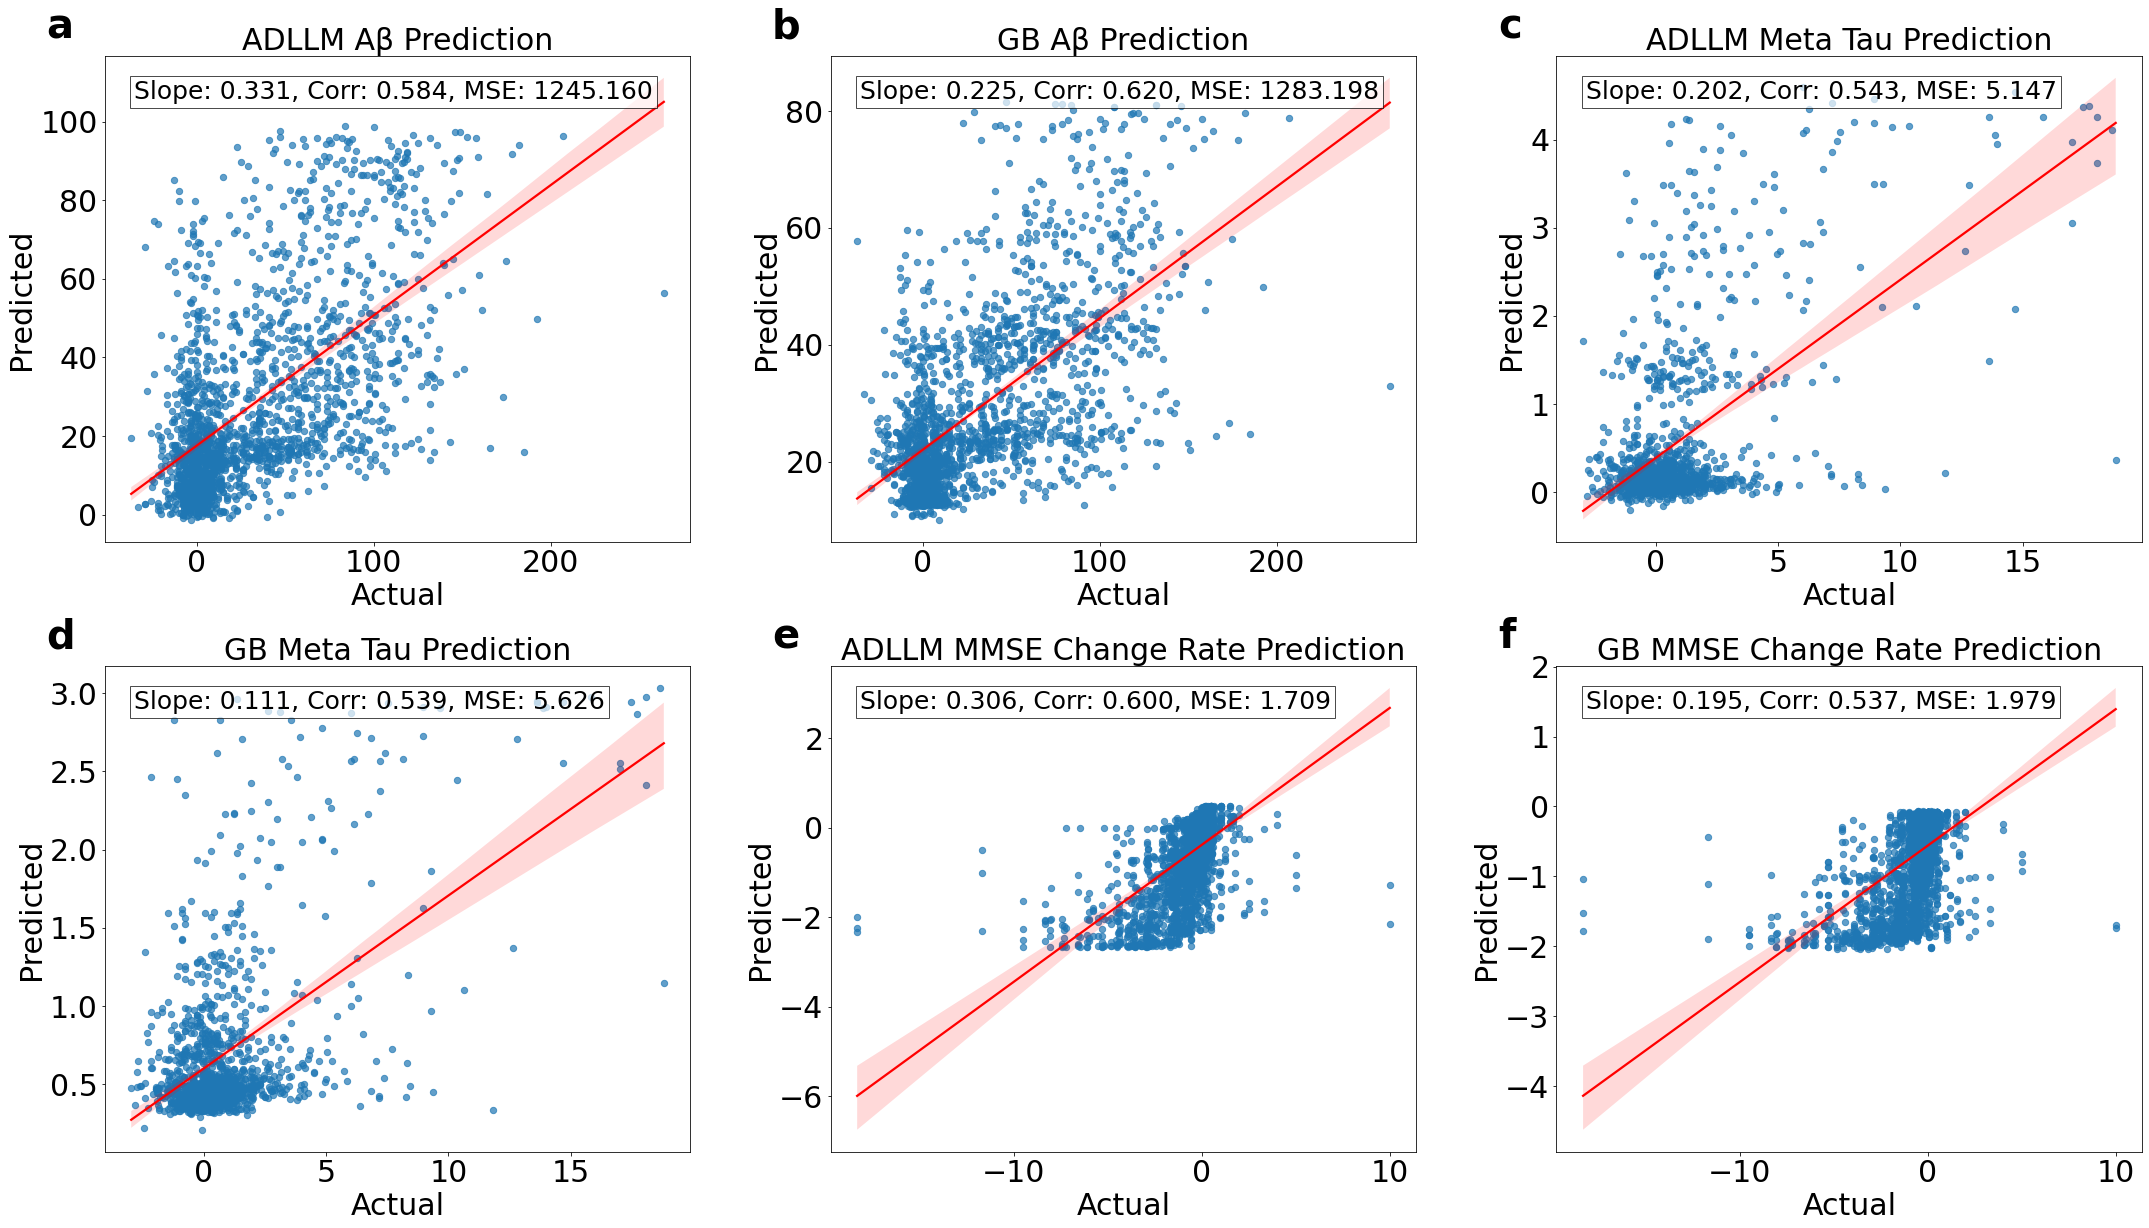

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import numpy as np

# Replace with your actual data

llm_abeta = LLM_Abeta
gb_abeta = GB_Abeta

llm_meta_tau = LLM_tau
gb_meta_tau =GB_tau


llm_mmse = LLM_mmse
gb_mmse = GB_mmse

# Function to create each subplot
def create_subplot(ax, x, y, title, panel_label):
    slope, intercept, r_value, _, _ = linregress(x, y)
    mse = mean_squared_error(x, y)

    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 40, 'alpha': 0.7}, line_kws={"color": "red"})
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('Actual', fontsize=30)
    ax.set_ylabel('Predicted', fontsize=30)
    annotation_text = f"Slope: {slope:.3f}, Corr: {r_value:.3f}, MSE: {mse:.3f}"
    ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=25,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Adjust tick label font size
    ax.tick_params(axis='both', which='major', labelsize=30)

    # Add panel label
    ax.text(-0.1, 1.1, panel_label, transform=ax.transAxes, fontsize=40, fontweight='bold',
            va='top', ha='left')

# Create figure with 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(30, 18))
panel_labels = ['a', 'b', 'c', 'd', 'e', 'f']

# Subplots for Aβ
create_subplot(axes[0, 0],  llm_abeta,LLM_Abeta_original, "ADLLM Aβ Prediction", panel_labels[0])
create_subplot(axes[0, 1],  gb_abeta, GB_Abeta_original,"GB Aβ Prediction", panel_labels[1])

# Subplots for Meta Tau
create_subplot(axes[0, 2],  llm_meta_tau, LLM_tau_original,"ADLLM Meta Tau Prediction", panel_labels[2])
create_subplot(axes[1, 0],  gb_meta_tau,GB_tau_original, "GB Meta Tau Prediction", panel_labels[3])

# Subplots for MMSE Change Rate
create_subplot(axes[1, 1],  llm_mmse,LLM_mmse_original, "ADLLM MMSE Change Rate Prediction", panel_labels[4])
create_subplot(axes[1, 2], gb_mmse,GB_mmse_original,  "GB MMSE Change Rate Prediction", panel_labels[5])

# Adjust layout


# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\\Result_visualization\\correlation.svg", format="svg")
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\\Result_visualization\\correlation.png", format="png")
plt.show()


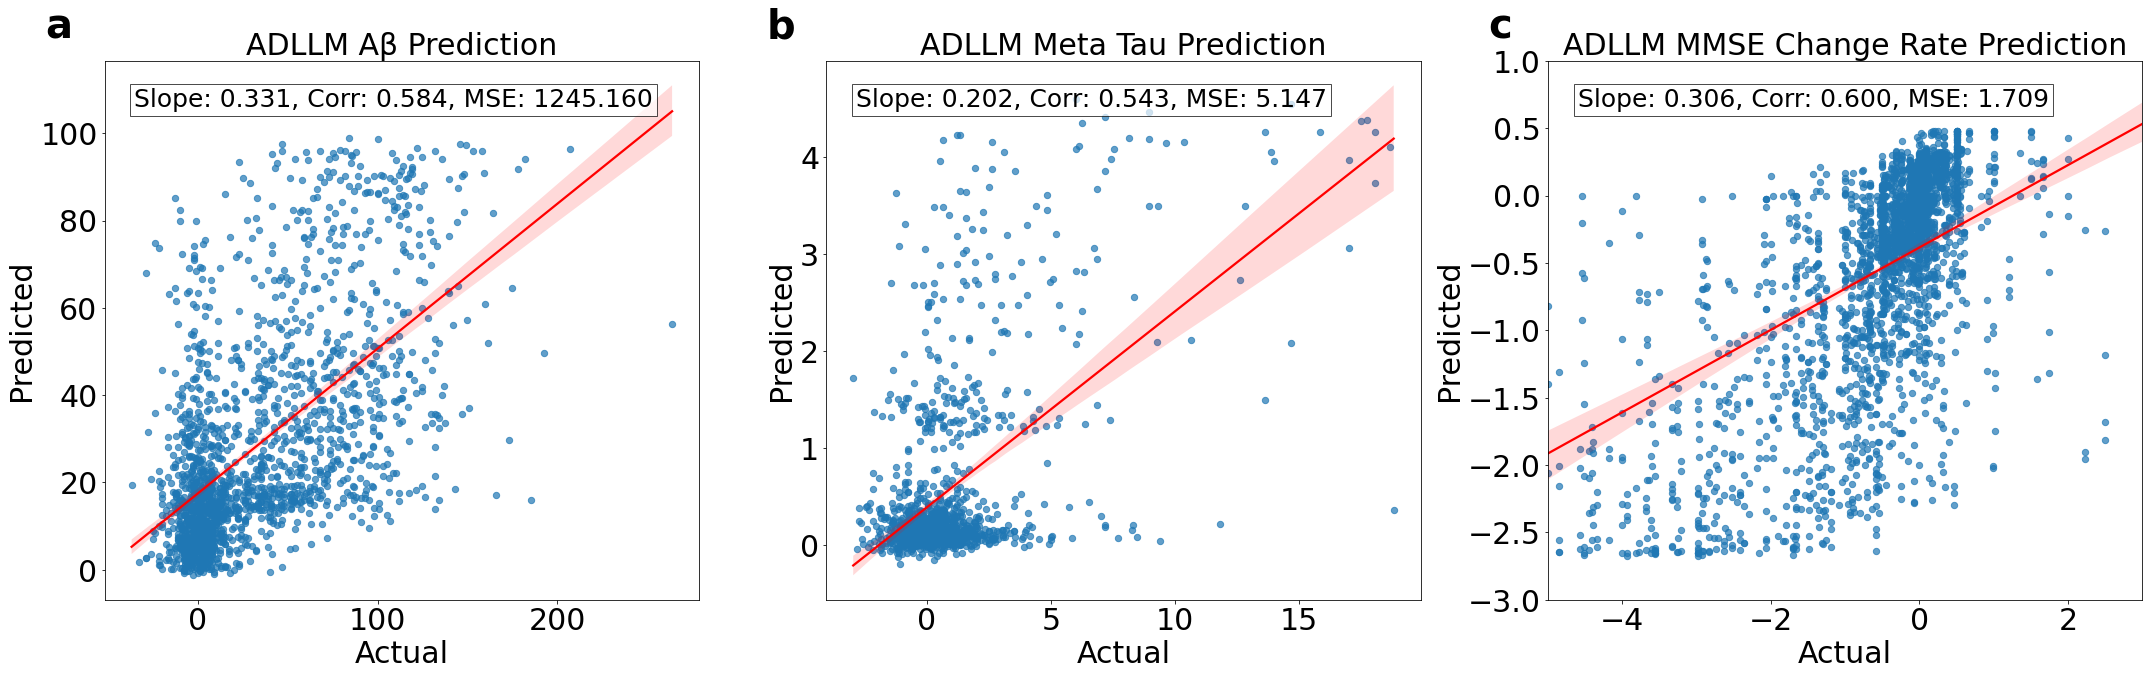

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

# Replace with your actual data
llm_abeta = LLM_Abeta
llm_meta_tau = LLM_tau
llm_mmse = LLM_mmse

# Function to create each subplot
def create_subplot(ax, x, y, title, panel_label, x_limit=None,y_limit=None):
    slope, intercept, r_value, _, _ = linregress(x, y)
    mse = mean_squared_error(x, y)

    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 40, 'alpha': 0.7}, line_kws={"color": "red"})
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('Actual', fontsize=30)
    ax.set_ylabel('Predicted', fontsize=30)
    annotation_text = f"Slope: {slope:.3f}, Corr: {r_value:.3f}, MSE: {mse:.3f}"
    ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=25,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Adjust tick label font size
    ax.tick_params(axis='both', which='major', labelsize=30)

    # Set x-axis limit if provided
    if x_limit:
        ax.set_xlim(x_limit)
    if y_limit:
        ax.set_ylim(y_limit)
    # Add panel label
    ax.text(-0.1, 1.1, panel_label, transform=ax.transAxes, fontsize=40, fontweight='bold',
            va='top', ha='left')

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
panel_labels = ['a', 'b', 'c']

# Subplots for LLM predictions
create_subplot(axes[0], llm_abeta, LLM_Abeta_original, "ADLLM Aβ Prediction", panel_labels[0])
create_subplot(axes[1], llm_meta_tau, LLM_tau_original, "ADLLM Meta Tau Prediction", panel_labels[1])
create_subplot(axes[2], llm_mmse, LLM_mmse_original, "ADLLM MMSE Change Rate Prediction", panel_labels[2], x_limit=(-5, 3),y_limit=(-3, 1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\Result_visualization\llm_correlation.svg", format="svg")
plt.savefig("D:\Research\AD\ADLLM\ADNI process 9\Result_visualization\llm_correlation.png", format="png")
plt.show()


In [83]:
np.max(llm_abeta)

264.0

### Incomplete Correlation

In [3]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_abeta.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\index_complete.csv")["Index"])
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown." ) & (abeta_probability["Index"].isin(index_complete) )]


In [6]:
abeta_subset

,Index,Abeta-Clearly positive,Abeta-Weakly positive,Abeta-Intermediate negative,Abeta-Negative,Truth,CENTILOIDS
39,39,0.159383,0.081405,0.167032,0.592180,Weakly positive,57.0
47,47,0.712471,0.116308,0.129751,0.041471,Weakly positive,57.0
49,49,0.903025,0.059561,0.032893,0.004522,Clearly positive,68.0
168,168,0.950561,0.033559,0.014210,0.001671,Clearly positive,84.0
186,186,0.776160,0.097148,0.095642,0.031050,Clearly positive,96.0
...,...,...,...,...,...,...,...
2417,2417,0.004382,0.005044,0.044260,0.946314,Negative,9.0
2430,2430,0.010652,0.015258,0.101061,0.873030,Negative,-16.0
2433,2433,0.646189,0.125270,0.135449,0.093092,Clearly positive,100.0
2435,2435,0.345781,0.067033,0.107118,0.480069,Negative,-11.0


In [8]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_abeta.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\index_complete.csv")["Index"])
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown." ) & (abeta_probability["Index"].isin(index_complete) )]
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 2.40800091e+01  8.37878875e+01  9.81453829e+01  1.01264674e+02
  8.85234637e+01  4.74946125e+01  7.27087125e+01  2.32727491e+01
  1.06202357e+01  1.79460020e+01  2.96830134e+00  3.12820341e+00
  8.57445818e+00  3.44727940e+00  1.78235420e+01  8.53566908e+01
  3.73586529e-01  1.41824157e+01  1.17022706e+01  2.49212057e+01
  6.13739223e+01  8.83940748e+00  5.63017212e+01  1.48042502e+01
  6.55940804e+01  5.02486083e+01  4.84020497e+01  4.98630738e+01
  8.19709863e+01  5.38789500e+01  7.70867447e+01  8.07584592e+01
  7.35786198e+01  9.17900383e+01  5.26480263e+00  3.70167414e+01
  8.02442535e+00  6.24557807e+00  8.39698664e+01  8.79278391e+01
  2.39956490e+01  7.83781288e+01  9.16109816e+01  7.81297022e+01
  7.64870743e+01  8.85437984e+01  7.96545702e+01  4.11265663e+00
  5.42406611e+00  3.97075636e+01  4.80987847e+01  9.96163064e+01
  3.66053052e+01  6.52633247e+01  7.69506842e+00  3.02466588e+00
  4.92245473e+01  7.28660904e+01  9.20818176e+01  3.10471314e+00
  1.82457501e+01  1.11615

In [9]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_abeta_incomplete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\index_complete.csv")["Index"])
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown." ) & (abeta_probability["Index"].isin(index_complete) )]
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[16.44508069 65.44749597 90.77285797 98.05516061 71.34128617 78.54516928
 77.81056135 17.29028839 31.10834121 45.71654539 23.52463591 25.58659194
 38.81248148 46.70583758 54.27613948 85.09041856 13.90544152 64.5020342
 50.19790254 62.26863499 66.22233251 45.16726796 56.78475981 21.80230154
 32.53442578 43.64208999 36.14706008 41.0376741  81.90515776 57.43505717
 73.70234861 80.57203757 72.85631318 80.6545682  41.99367488 68.19751973
 16.29493227 21.31689859 72.0046765  77.32126279 32.79417194 68.75395434
 84.59940175 73.68756771 70.87752474 78.76330876 70.14810046 25.87999303
 16.61722702 30.70617758 34.3253197  98.63504535 29.52098483 51.94488727
 25.76147582 11.91155515 36.64146348 62.23139626 85.06135928 10.13973152
 55.67416393 51.14650811 50.23910645 47.29999418 32.8901654  68.55688543
 27.45172136 43.25099823 70.15852642  4.42421846  6.56971194  7.62471036
 77.66180412 64.57140217 75.60642629 76.55130808 84.01700949  5.52434713
 96.12494914 98.19534428 11.36993826 41.08705303 26.

In [12]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta_incomplete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\index_complete_habs.csv")["Index"])
abeta_probability["CENTILOIDS"]=abeta_testing["nearest_ab_centiloid"]
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown." ) & (abeta_probability["Index"].isin(index_complete) )]
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[11.62733622  5.8490309   6.83667221  7.45260103  5.72832731  7.1212012
  7.10544032 27.86292478 15.58334094 41.53703879 10.5802008   7.60123686
  6.75986163 36.93779939 45.26353164 12.68534894  8.60378684  5.71093748
 77.22348988  4.82596785 21.8610257  10.2713762  36.66278018 21.77175316
  7.25578238 76.75203118 14.15177492  5.95873656  7.06508439 26.8399477
  9.38236331  8.41641258 17.24267896 10.80592783 34.96586177  6.82645024
 15.72113603 36.28335251  5.79674058 18.10100044 52.70209609 33.85119652
 10.23146067 34.07797477 12.00794551 10.28764247 20.02889925 13.98847619
  8.41346677 28.88708591 69.75572621 27.42661714  7.87328172 11.30236244
  8.92180828 29.0384922  15.21373763 33.14848896 19.35587535 11.82013209
  6.5964586   4.03739044 15.62402144  4.44705067  4.10363378  5.86165704
  7.3887856   6.07735907  5.12428078 24.30261801  7.51811269  6.66669493
  9.03503101  4.59125891 16.52590831 19.90018957  9.05321986  8.46065173
 10.76288332  7.14765846 17.72923343  4.04281062 15.6

In [ ]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta_incomplete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\index_complete_habs.csv")["Index"])
abeta_probability["CENTILOIDS"]=abeta_testing["nearest_ab_centiloid"]
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown." ) & (abeta_probability["Index"].isin(index_complete) )]
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


In [13]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_abeta.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\index_complete_habs.csv")["Index"])
abeta_probability["CENTILOIDS"]=abeta_testing["nearest_ab_centiloid"]
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown." ) & (abeta_probability["Index"].isin(index_complete) )]
import numpy as np
predictions_probs=abeta_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ['Clearly positive','Weakly positive', 'Intermediate negative', 'Negative']

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 8.4903453   5.19738428  4.58989482  5.36046085  4.56571936  6.17418414
  6.30757273 18.43927525 16.81922941 33.6103222   9.09538624  5.19464768
  4.62586365 31.4658763  40.90789781  9.19528509  7.30518932  5.01065069
 73.80802314  3.82852285 23.54136316  7.02291606 33.29280443 18.09991265
  6.45894518 81.28669767 10.62075218  4.9549574   5.07484013 20.89533325
  9.65513028  7.03131977 18.09257787  8.46773506 30.27916239  4.40178417
 16.41930219 27.96837188  6.19457229 10.86597233 44.67061956 27.27906988
  8.23717929 31.14279334 10.83594599  9.54648065 18.04550551 16.0477117
  8.02247316 25.89172168 77.12705881 25.463903    6.8813599  10.72764997
  9.25811237 36.8734064  18.78491148 36.55886827 19.0476882  14.49861272
  7.30862005  3.93610412 19.55965811  4.23773792  4.08396561  5.25391417
  8.14480918  6.69066883  5.11775779 24.63097782  7.42496526  7.45799006
 10.86343396  4.2084914  19.97035354 24.41870063  8.75891196  9.16377355
 11.96741654  6.69672291 24.71929307  4.00804785 17.

###  Meta tau

In [14]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\index_complete_habs.csv")["Index"])

tau_subset=tau_probability[(tau_probability["Truth"]!="Unknown." ) & (tau_probability["Index"].isin(index_complete) )]
import numpy as np
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 7.00518991e-02  7.06220527e-02  1.98944517e-01  8.41838783e-02
  7.38799659e-02  2.06277730e-01  2.74023748e-01  3.67541606e-01
  1.79252653e-01  1.05315031e-01  3.48047718e-01  2.44666251e-01
  1.34365194e-01  1.79877338e-02  1.95605112e-01  3.46890204e-01
  3.14397275e-01  2.68953060e+00  2.17891139e-01  4.63724321e-02
  1.56882304e-01  1.54646658e-01  2.68840231e-01  1.87815687e-01
  3.90147300e-01  1.39046468e-01  2.71458887e-01  4.57221291e-01
  7.86173355e-02  4.77619701e-01  3.00918841e-01  2.43908909e-01
  3.82744318e-01  2.33900717e-01  1.22125261e-01  1.39411670e-01
  1.04485997e-02  1.74948867e-01  1.89594716e+00  3.99486420e-02
  3.81893966e-02  1.80971674e-01  1.38293994e-01  1.37893843e-01
  4.76158357e-02 -8.18784548e-03  4.26586319e-01  3.00953513e-02
  3.28084268e-02 -3.32366170e-02  1.48232840e-01  2.38663992e-01
  3.06479211e-02  1.20698896e-01  2.31081699e-01  1.68876012e-01
  2.11407931e-01  1.62514306e-01  9.19082959e-02 -6.53775173e-03
  6.33751692e-02  2.76583

In [15]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD-results\\HABS_probability_meta_tau_incomplete.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\index_complete_habs.csv")["Index"])

tau_subset=tau_probability[(tau_probability["Truth"]!="Unknown." ) & (tau_probability["Index"].isin(index_complete) )]
import numpy as np
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[ 8.22333355e-02  2.54783117e-02  2.27704987e-01  4.64600571e-02
  6.26635380e-02  3.58042577e-01  4.05900137e-01  4.14980700e-01
  1.56601494e-01  1.13572280e-01  4.89308065e-01  2.25644797e-01
  1.24134788e-01  1.12678349e-02  1.54992114e-01  3.65984333e-01
  3.54144184e-01  2.62948428e+00  3.12595436e-01  3.95099647e-02
  1.58766143e-01  2.52178458e-01  3.44052282e-01  1.68765273e-01
  3.53910961e-01  1.32127591e-01  2.68088987e-01  5.12441757e-01
  6.63197837e-02  1.78105279e+00  3.25535259e-01  2.53015100e-01
  5.05737609e-01  2.67883053e-01  1.66096319e-01  1.99158952e-01
  1.33914553e-02  2.30563484e-01  1.91719369e+00  5.33960454e-02
  6.05530344e-02  2.01765307e-01  3.07148036e-01  1.72416352e-01
  3.88054490e-02 -1.21024758e-02  4.43777740e-01  7.21391090e-02
  4.11423757e-02 -4.10549897e-02  1.90978330e-01  2.92370369e-01
  4.63612476e-02  1.35077482e-01  2.50229390e-01  1.98851403e-01
  2.27623376e-01  1.55151986e-01  1.65707919e-01 -2.22323035e-02
  1.93279013e-01  2.81572

In [17]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_meta_tau.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI_thickness_Dec_17_testing.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\index_complete.csv")["Index"])

tau_subset=tau_probability[(tau_probability["Truth"]!="Unknown." ) & (tau_probability["Index"].isin(index_complete) )]
import numpy as np
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[0.67425124 2.34673442 2.62608063 2.62773991 4.38395541 0.26599526
 0.31309543 1.92659053 0.60371759 0.23391196 0.71060654 3.87170295
 4.70647208 0.709972   0.22560516 0.37977202 4.62208907 2.86377293
 3.68051308 3.8352393  0.25060038 0.35870561 0.34229707 0.17128968
 0.29514053 3.44331883 0.26458962 0.18221302 0.26206823 3.23657763
 0.82381844 0.24926327 0.26011459 0.27975321 0.19459074 0.19258725
 0.18889956 0.43768268 2.23771872 0.42273895 4.09490324 0.30676047
 0.41507687 0.61886989 0.15991973 0.3121714  0.27518723 0.21207623
 0.5145853  0.11331745 2.98568635 2.71158465 0.08770065 0.33559566
 0.34605524 4.18177655 3.67408301 0.11059506 0.13944205 0.27236028
 2.83434616 2.73208566 0.39816499 3.61889647 0.14074149 0.33186181
 0.20599887 0.47661487 2.83538675 0.13924599 0.17705219 3.17579295
 2.91200736 0.54552017 0.48618558 0.45704466 0.40003436 3.82756043
 0.18378652 2.86272997 0.7070909  4.33514804 3.56158699 3.70235765
 4.18883122 4.32872836 3.4929712  0.47483278 0.6535677  3.1514

In [18]:
import pandas as pd
tau_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI-results\\ADNI_probability_meta_tau_incomplete.csv")
tau_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\ADNI_thickness_Dec_17_testing.csv")
tau_probability["zscore_meta_tau"]=tau_testing["zscore_meta_tau"]
index_complete=list(pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\index_complete.csv")["Index"])

tau_subset=tau_probability[(tau_probability["Truth"]!="Unknown." ) & (tau_probability["Index"].isin(index_complete) )]
import numpy as np
import numpy as np
predictions_probs=tau_subset.iloc[:,1:5]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":tau_subset.zscore_meta_tau,  # Replace with actual data
    'label': tau_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values

recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[2.68440454 0.68198177 1.38626337 2.98379638 4.55158977 2.14647344
 0.51743101 0.57573814 0.61962998 0.38929824 3.71818698 3.59260195
 4.5163459  2.24341789 0.5262538  0.57084697 4.67034966 0.9528072
 3.6539101  3.16694089 0.32423474 0.56002206 0.58398925 0.45229227
 0.38812698 2.84261748 0.3917987  0.77422318 0.65557674 0.90016436
 0.74692057 0.34226405 0.44467609 0.52038275 0.37419452 0.23433453
 0.50760401 0.62839085 0.39203847 0.33965572 3.73394357 0.40947772
 0.53179281 0.45411239 0.28772605 0.50570603 0.33109947 0.31277719
 0.4448955  0.29657374 0.46833176 2.3481809  0.25055469 0.19693825
 0.33733456 3.93087417 3.25358135 0.22203936 0.38476551 0.496752
 2.51560004 0.48577636 0.244367   3.25887155 0.38881809 0.48229947
 0.36369713 0.39723693 0.48013511 0.3834095  0.35674344 2.42258007
 2.73373152 0.40354312 0.4919564  0.83699858 1.10037021 1.18920519
 0.35280508 0.59640113 0.60206497 4.02558327 3.17603475 2.7175874
 3.8967108  4.03300069 3.0316298  2.47215651 0.48188659 0.48742676

## GB-Incomplete

In [34]:
GB_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 213,
 217,
 229,
 232,
 278,
 346,
 418]

In [24]:
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_complete_meta_tau.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_final.csv")
abeta_probability["CENTILOIDS"]=abeta_testing["CENTILOIDS"]
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (abeta_testing["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (abeta_testing["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(abeta_testing["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.") &( abeta_probability.index.isin(GB_index))]
import numpy as np

In [57]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_complete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_final.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (abeta_testing["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (abeta_testing["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(abeta_testing["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["CENTILOIDS"])
abeta_subset["CENTILOIDS"]=centiloid_list

import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[13.21410772 13.69162753 14.40545578 13.13905209 14.69069339 13.5786523
 13.93670345 20.30494044 14.83552787 18.73944459 13.156528   15.06058182
 12.99794547 23.94488357 22.84876239 15.15843298 14.15728281 13.10860295
 46.65452984 13.70719367 15.4985499  13.47642483 20.71550733 16.74161141
 15.18792413 48.07905396 17.19820165 13.87963759 12.99545533 16.58339542
 13.95193673 14.24832167 22.29042086 14.49391485 16.78664805 13.7184914
 14.12411501 17.86664309 13.0013347  19.60715247 27.46247342 18.79558947
 15.25599563 24.74850099 15.76819845 19.75371256 20.84741123 16.44370245
 16.88143218 20.83200002 26.31959539 19.97350851 16.65450829 17.34359857
 17.62871487 29.99566357 26.6578893  23.26261485 32.7261231  21.07561778
 13.55499413 13.57291884 19.81646035 13.93378174 13.14416658 13.62205687
 14.13381985 12.80874415 13.86766533 19.98536906 21.69967344 15.70817894
 15.58609631 13.93447101 24.94099234 18.9817513  16.58243194 18.19208897
 16.13105684 20.23036041 22.5504031  13.05278544 20.8

In [43]:
means

label
Clearly positive          4.000000
Intermediate negative    23.500000
Negative                  5.797297
Weakly positive          -7.500000
Name: CENTILOIDS, dtype: float64

In [58]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_incomplete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\HABS_testing_final.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (abeta_testing["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (abeta_testing["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(abeta_testing["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["CENTILOIDS"])
abeta_subset["CENTILOIDS"]=centiloid_list
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[13.21410772 13.69162753 14.40545578 13.13905209 14.69069339 13.5786523
 13.93670345 20.25816531 14.83552787 18.73944459 13.156528   15.06058182
 12.96192495 23.94488357 22.84876239 15.15843298 14.15728281 13.10860295
 46.71326792 13.70719367 15.4985499  13.47642483 20.74899822 16.74161141
 15.18792413 48.1379385  17.15538977 13.84202434 12.99545533 16.58339542
 13.95193673 14.24832167 22.29042086 14.49391485 16.78664805 13.7184914
 14.12411501 17.82293212 13.0013347  19.56113184 27.46247342 18.82618498
 15.25599563 24.74850099 15.72746968 19.75371256 20.82782002 16.44370245
 16.88143218 20.81239462 26.31959539 19.95409005 16.63616861 17.34359857
 17.62871487 29.99566357 26.6578893  23.26261485 32.7261231  21.05616513
 13.51796825 13.53582446 19.81646035 13.93378174 13.14416658 13.62205687
 14.13381985 12.80874415 13.86766533 19.96610527 21.65167665 15.70817894
 15.58609631 13.93447101 24.94099234 18.9817513  16.58243194 18.19208897
 16.13105684 20.23036041 22.5504031  13.05278544 20.8

In [55]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_incomplete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']!=-9999) | (abeta_testing["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]!=-9999) | (abeta_testing["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]!=-9999) |(abeta_testing["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]!=-9999)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["CENTILOIDS"])
abeta_subset["CENTILOIDS"]=centiloid_list
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[20.42813301 39.41560359 57.30525774 80.84766041 36.89372202 44.29949432
 47.03196277 22.27535791 33.88333528 29.88835    22.07967824 27.6028752
 29.55403943 34.71307693 32.18242191 42.54682391 23.88942295 31.75504302
 35.43994726 32.40581743 40.74144713 30.95715336 40.71297962 20.09333419
 21.95065798 20.64610414 20.08529716 24.16305805 58.14324122 35.66131743
 46.88307561 56.20706753 30.95755602 60.68679483 20.08687508 30.27361432
 24.60402438 24.84373875 62.58070282 68.99395946 29.44059493 57.21572282
 71.57653812 41.68295182 55.72531633 57.32161427 58.66751593 22.28587568
 22.28587568 31.62676821 39.80979804 34.6870546  70.32668788 39.16710539
 50.47700188 18.30311381 16.86920494 32.84133709 49.15415137 72.5452122
 22.55712116 41.65298834 41.1399304  43.86338698 41.68417904 48.22851301
 52.67476783 20.09475482 21.16773136 39.2988794  16.61570357 15.71029544
 16.77009423 62.03762295 38.33008343 40.74462654 51.79563412 64.44214696
 18.55541158 77.88399404 77.88399404 79.59851406 79.5

In [56]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_complete.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']!=-9999) | (abeta_testing["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]!=-9999) | (abeta_testing["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]!=-9999) |(abeta_testing["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]!=-9999)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["CENTILOIDS"])
abeta_subset["CENTILOIDS"]=centiloid_list
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
    'Negative': (-float('inf'), 20),        # For values < 1.139
    'Intermediate negative': (20, 40),                      # For values >= 1.139 and < 1.19
    'Weakly positive': (40, 60),              # For values >= 1.19 and < 1.27
    'Clearly positive': (60, float('inf'))         # For values >= 1.49
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Clearly positive","Intermediate negative","Negative","Weakly positive"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[22.12780847 55.77070358 69.32095887 83.14002107 61.16461757 30.20719604
 52.91172251 18.37463252 21.82906771 28.0084723  14.18909465 19.51529917
 21.14811488 26.03604541 33.91473426 56.15658993 18.4486074  37.7118968
 50.01011162 47.42394484 61.93380394 19.93733752 59.00215186 25.81209805
 40.46062809 42.08135217 41.40160301 44.32642166 59.38248036 60.39843054
 65.91863856 71.72317485 47.67649203 68.24208301 21.91053702 35.56300371
 16.50224529 22.2259418  66.36175603 69.4464718  26.8415805  72.31491734
 79.84497942 60.74976652 69.89970502 71.7939893  72.88474785 15.39536108
 15.39536108 26.53874712 60.72215822 54.15537871 79.03899663 58.28698026
 65.18523511 16.65128514 14.95946154 33.16305189 62.58518791 79.43124688
 16.18022599 30.45172092 30.79956568 34.61423724 35.76284237 49.07097667
 71.55639621 15.68138933 30.12556998 40.95528054 11.46654421 11.35884837
 11.57864086 75.66716738 51.98757255 52.89214239 69.67240805 73.67073535
 18.85476031 82.8290394  82.8290394  83.1236965  83.

## Meta tau

In [59]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_complete_meta_tau.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final_meta_tau.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']!=-9999) | (abeta_testing["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]!=-9999) | (abeta_testing["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]!=-9999) |(abeta_testing["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]!=-9999)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["zscore_meta_tau"])
abeta_subset["CENTILOIDS"]=centiloid_list
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[1.47750309 1.08286479 2.05720291 1.25112548 2.60360679 1.33895844
 1.7911979  0.8051797  1.11395567 1.09040417 1.72437073 2.88952676
 3.09466328 1.46504    1.30346222 1.36303623 3.04919979 1.69974756
 1.69815837 1.97087095 1.12834573 1.06343207 1.43999148 0.87752799
 1.37085586 1.21398165 0.97988789 1.26155007 1.28166727 2.6794611
 2.62501146 0.8459815  0.85097714 0.88724078 0.76529946 0.73276175
 1.13355012 1.74780686 0.97808598 0.74095165 3.06618978 0.77975469
 0.80064124 1.10564906 0.86282628 1.00193463 0.86125243 0.85161013
 0.85803792 0.8877315  1.24782972 1.30554059 0.81003094 0.76319317
 0.83373392 2.78368837 1.38321716 0.92604709 1.01069075 1.00108794
 0.99421731 1.08503599 0.8116942  1.08171023 0.93350129 0.93332125
 0.88866793 0.90016112 0.91874277 0.77777278 1.03165583 1.40087391
 2.1895604  0.76681731 1.16495801 0.95049633 0.90738489 3.01015644
 0.7330622  1.11162055 1.01299331 2.7487892  1.63202617 1.75357112
 2.71902773 3.21916846 0.97016566 0.81228942 0.9214407  1.08760

In [60]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_incomplete_meta_tau.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final_meta_tau.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']!=-9999) | (abeta_testing["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]!=-9999) | (abeta_testing["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]!=-9999) |(abeta_testing["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]!=-9999)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["zscore_meta_tau"])
abeta_subset["CENTILOIDS"]=centiloid_list
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[1.48597457 0.9420813  1.87317013 1.12106447 2.47349169 1.21020007
 1.60674737 0.8051797  1.14747551 1.15377033 1.78187209 2.74210641
 3.09466328 1.49884754 1.15551257 1.20048596 3.03301658 1.71348675
 1.58787396 1.81281628 1.14623407 1.08562112 1.47634183 0.89601052
 1.39229966 1.06126464 0.95390199 1.28451982 1.31959349 2.53744852
 2.47540658 0.829614   0.86974752 0.90848319 0.78639638 0.74343721
 1.17922887 1.82904746 0.98755072 0.74162935 2.90897547 0.76678307
 0.80653653 0.90764219 0.89384295 1.02163934 0.87444301 0.87693317
 0.81752078 0.91508134 1.05401958 1.09708883 0.75355283 0.78125638
 0.83564649 2.77289574 1.38569689 0.94150147 1.02297196 1.02304612
 0.86314743 1.02297175 0.81732378 1.03763256 0.95089273 0.94449038
 0.9172942  0.89856681 0.94440508 0.76685605 1.06797469 1.20189178
 1.9779969  0.75674822 0.99946998 0.8891016  0.928733   3.02545314
 0.74976644 1.11244445 1.02021153 2.57066971 1.63202617 1.74516116
 2.54005528 3.08395808 0.98782059 0.82353287 0.91731265 0.9487

In [61]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_incomplete_meta_tau.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_final_meta_tau.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (abeta_testing["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (abeta_testing["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(abeta_testing["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["zscore_meta_tau"])
abeta_subset["CENTILOIDS"]=centiloid_list
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[0.44587716 0.45834803 0.45939841 0.49263365 0.41848434 0.73328983
 0.52361708 0.47804286 0.43453207 0.50964359 0.68202004 0.55533201
 0.46329695 0.48189976 0.42843243 0.77327745 0.61233821 1.38798902
 0.4853894  0.44437414 0.5001825  0.48878004 0.6101041  0.42735356
 0.44230577 0.48273171 0.49135605 0.56352735 0.39321817 0.87763717
 0.67041865 0.4674852  0.65818772 0.46085691 0.45667903 0.39929972
 0.42651905 0.53990681 0.55523568 0.37435519 0.42902783 0.76843155
 0.51177725 0.8114862  0.6798834  0.38023213 0.52346127 0.43128076
 0.42011248 0.45361447 0.53907606 0.62420286 0.52707886 0.54642506
 0.70293881 0.41302832 0.67369405 0.54077243 0.50375056 0.41179955
 0.34978931 1.06951404 0.4365654  0.52623938 0.58093541 0.77423564
 0.37363685 0.3687058  0.59968269 0.39887534 0.68428892 0.42554701
 0.6582387  0.63415011 0.42784742 0.58225096 0.45963374 0.4258036
 0.38914664 0.4231262  0.38491462 0.58438817 0.37295134 0.55163942
 0.45033593 0.37942783 0.57636181 0.56059326 0.6262334  0.47337

In [62]:
import pandas as pd
abeta_probability=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_complete_meta_tau.csv")
abeta_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_final_meta_tau.csv")
GB_index=list(abeta_testing[(abeta_testing['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (abeta_testing["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (abeta_testing["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(abeta_testing["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)].index)
abeta_subset=abeta_probability[(abeta_probability["Truth"]!="Unknown.")]
centiloid_list=list(abeta_testing[abeta_testing.index.isin(GB_index)]["zscore_meta_tau"])
abeta_subset["CENTILOIDS"]=centiloid_list
import numpy as np
predictions_probs=abeta_subset.iloc[:,2:6]
predictions_probs.index=range(predictions_probs.shape[0])
combined_df = pd.DataFrame({
    "CENTILOIDS":abeta_subset.CENTILOIDS,  # Replace with actual data
    'label': abeta_subset.Truth  # Replace with actual labels
})
means = combined_df["CENTILOIDS"].groupby(combined_df['label']).mean()
cutoffs = {
   'Very low': (-float('inf'), -0.412928709),        # For values < 1.139
  'Low': (-0.412928709, 0.19369568),                      # For values >= 1.139 and < 1.19
    'High': (0.19369568, 1.03469779),         # For values >= 1.49
    'Super high': (1.03469779, float('inf'))
}

# Initialize an empty list to store the recovered predicted values


recovered_values = []
# Order of labels as per the predictions_probs columns
labels_order = ["Low","Very low","Super high","High"]

# Loop through each set of probabilities in predictions_probs
for j in range(predictions_probs.shape[0]):
    weighted_sum = 0
    probs=list(predictions_probs.loc[j,:])
    # Calculate the weighted sum by multiplying the probabilities by the means of each category
    for i, label in enumerate(labels_order):
        weighted_sum += probs[i] * means[label]
    
    # Determine the label with the highest probability
    label_with_max_prob = labels_order[np.argmax(probs)]
    
    # Clip the value based on the cutoffs for the predicted label
    min_val, max_val = cutoffs[label_with_max_prob]
    clipped_value = np.clip(weighted_sum, min_val, max_val)
    
    # Append the clipped value to the list of recovered values
    recovered_values.append(weighted_sum)

# Convert the list to a numpy array or pandas Series if needed
recovered_values = np.array(recovered_values)
print(recovered_values)
correlation = np.corrcoef(list(combined_df.CENTILOIDS), recovered_values)[0, 1]

# Print the correlation result
print("Correlation:", correlation)
mse = np.mean((combined_df.CENTILOIDS - recovered_values) ** 2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)


[0.44587716 0.45834803 0.45958545 0.4927928  0.41848434 0.73796446
 0.52361708 0.47927306 0.43474832 0.50979939 0.68356416 0.55533201
 0.46329695 0.48189976 0.4286797  0.77495568 0.61377777 1.37905427
 0.4853894  0.44437414 0.5001825  0.49004897 0.6101041  0.42735356
 0.44230577 0.48273171 0.49154113 0.56493054 0.39349028 0.87844671
 0.67041865 0.46869065 0.65920435 0.46106664 0.45764046 0.39929972
 0.42680934 0.53990681 0.55664716 0.37435519 0.4292435  0.76843155
 0.51193955 0.81291568 0.6798834  0.38056607 0.52346127 0.43128076
 0.42011248 0.45361447 0.53907606 0.62420286 0.52707886 0.54642506
 0.70449872 0.41419168 0.67369405 0.54209776 0.50375056 0.41179955
 0.34978931 1.06989335 0.4365654  0.52761829 0.58093541 0.77423564
 0.37363685 0.36905923 0.60116035 0.39915856 0.68539843 0.42671941
 0.65974797 0.63415011 0.42784742 0.58363293 0.45963374 0.4269692
 0.38942923 0.4231262  0.38491462 0.58438817 0.37295134 0.5517577
 0.45033593 0.37971638 0.58042474 0.56059326 0.6262334  0.474302